In [46]:
import numpy as np
import matplotlib.pyplot as plt
import nrrd
from scipy import stats
from scipy.spatial.distance import jaccard
from sklearn.metrics import jaccard_score
import statistics 

In [12]:
mask_gt,header=nrrd.read('C:/Users/bvtran/OneDrive - Inside MD Anderson/Documents/MRL_scripts/mask_gt')
mask_LSTM,header=nrrd.read('C:/Users/bvtran/OneDrive - Inside MD Anderson/Documents/MRL_scripts/LSTM_predictions')
mask_Unet,header=nrrd.read('C:/Users/bvtran/OneDrive - Inside MD Anderson/Documents/MRL_scripts/Unet_predictions')

In [19]:
def DICE_COE(mask1, mask2):
    intersect = np.sum(mask1*mask2)
    fsum = np.sum(mask1)
    ssum = np.sum(mask2)
    dice = (2 * intersect ) / (fsum + ssum)
    dice = np.mean(dice)
    dice = round(dice, 3) # for easy reading
    return dice

In [40]:
dice_LSTM=[]
jaccard_LSTM=[]
for i in range(len(mask_LSTM)):
    dice_LSTM.append(DICE_COE(mask_gt[i],mask_LSTM[i]))
    jaccard_LSTM.append(jaccard_score(mask_gt[i].flatten(),mask_LSTM[i].flatten()))
    
dice_Unet=[]
jaccard_Unet=[]
for i in range(len(mask_Unet)):
    dice_Unet.append(DICE_COE(mask_gt[i],mask_Unet[i]))
    jaccard_Unet.append(jaccard_score(mask_gt[i].flatten(),mask_Unet[i].flatten()))

In [50]:
#Find means and stdev:
mean_dice_LSTM=round(statistics.mean(dice_LSTM),3)
stdev_dice_LSTM=round(statistics.stdev(dice_LSTM),3)
mean_jaccard_LSTM=round(statistics.mean(jaccard_LSTM),3)
stdev_jaccard_LSTM=round(statistics.stdev(jaccard_LSTM),3)

mean_dice_Unet=round(statistics.mean(dice_Unet),3)
stdev_dice_Unet=round(statistics.stdev(dice_Unet),3)
mean_jaccard_Unet=round(statistics.mean(jaccard_Unet),3)
stdev_jaccard_Unet=round(statistics.stdev(jaccard_Unet),3)

In [57]:
#T-test:
ttest_dice=round(stats.ttest_ind(dice_LSTM, dice_Unet).pvalue,3)
ttest_jaccard=round(stats.ttest_ind(jaccard_LSTM, jaccard_Unet).pvalue,3)

In [78]:
ttest_jaccard

0.697

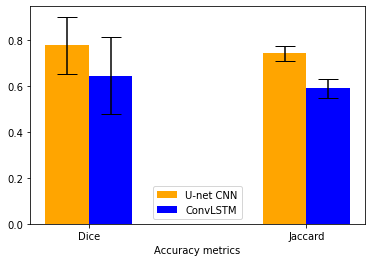

In [77]:
Dice =[mean_dice_Unet,mean_dice_LSTM]
Jaccard = [mean_jaccard_Unet,mean_jaccard_LSTM]
width = 0.2
x = np.arange(2)
error_dice=[stdev_dice_Unet,stdev_dice_LSTM]
error_jaccard=[stdev_jaccard_Unet,stdev_jaccard_LSTM]
# plot data in grouped manner of bar type
plt.bar(x-0.1, Dice,width,yerr=error_dice, color='orange',capsize=10)
plt.bar(x+0.1, Jaccard,width,yerr=error_jaccard, color='blue',capsize=10)
plt.xticks(x, ["Dice","Jaccard"])
plt.xlabel("Accuracy metrics")
plt.legend(["U-net CNN", "ConvLSTM"])
plt.show()

In [71]:
Dice

[0.777, 0.741]